## Data visualisation and Ridge_regression
### House Prices - Advanced Regression Techniques


[data-visualisation-and-ridge-regression](https://www.kaggle.com/tapendrakumar09/data-visualisation-and-ridge-regression)

In [458]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
import kaggle
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Importando Módulos / Download Dados

In [459]:
# Definição Funções
def download_Kaggle(fName, pathFile):
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files(fName, path=pathFile, unzip=True)


def get_DF_to_File(kaggleFile):
    dirname = os.path.abspath('')
    arquivo=dirname + '/../datasets/'+kaggleFile
    return arquivo

# Variáveis Definição
dataset = 'shree1992/housedata'
dataset_root = '../datasets'

download_Kaggle(dataset,dataset_root)


In [460]:

df=pd.read_csv(get_DF_to_File('data.csv'), sep=',')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# Análise Exploratória

In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [462]:
df.describe().transpose() #lets decribe the data 

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [463]:


#df["price"]=df["price"].astype(int)
df["bedrooms"]=df["bedrooms"].astype(int)
df["bathrooms"]=df["bathrooms"].astype(int)
df["floors"]=df["floors"].astype(int)


df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

# Visualização

<AxesSubplot:xlabel='yr_built', ylabel='price'>

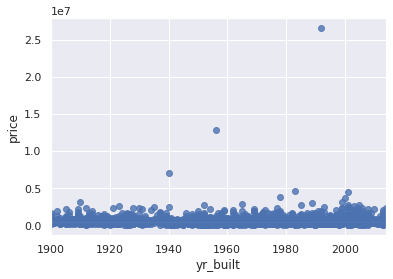

In [464]:
sns.set(style="darkgrid")
sns.regplot(x=df['yr_built'], y= df["price"])

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

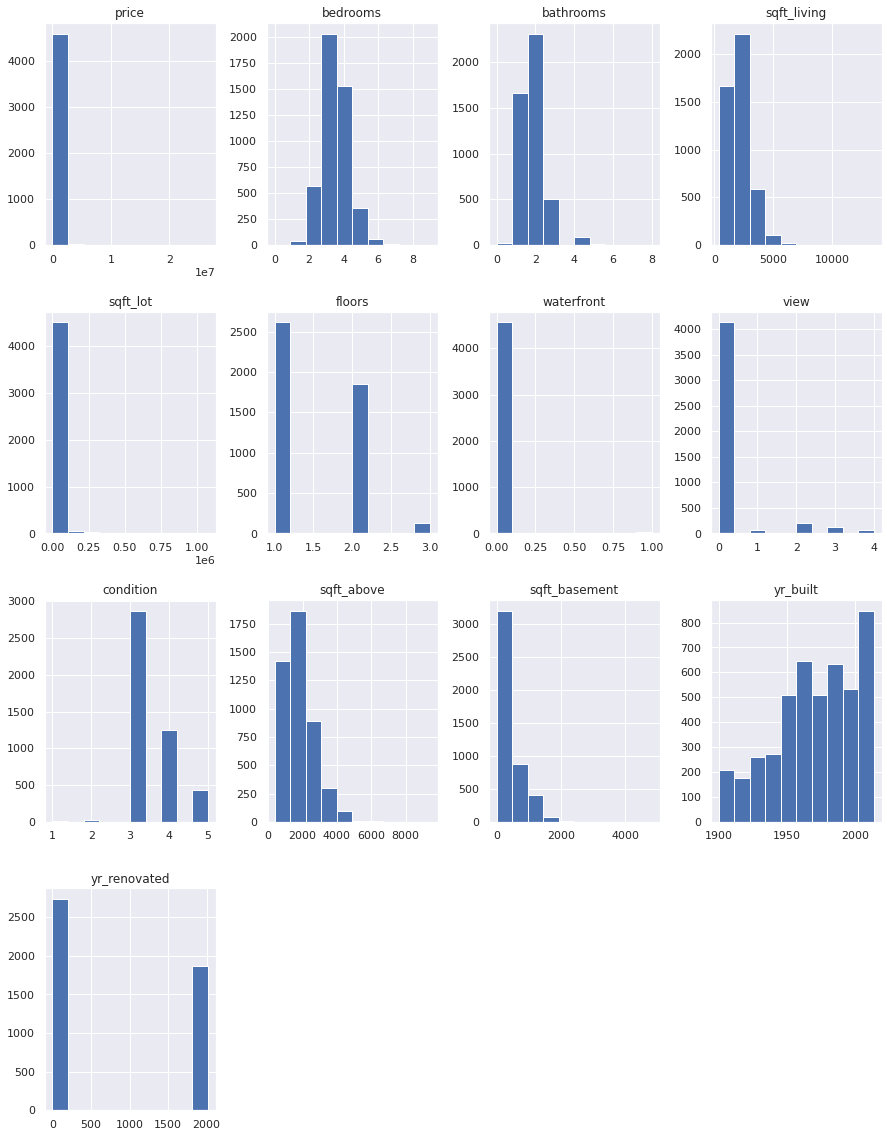

In [465]:
df.hist(figsize=(15,20))

<AxesSubplot:xlabel='price', ylabel='city'>

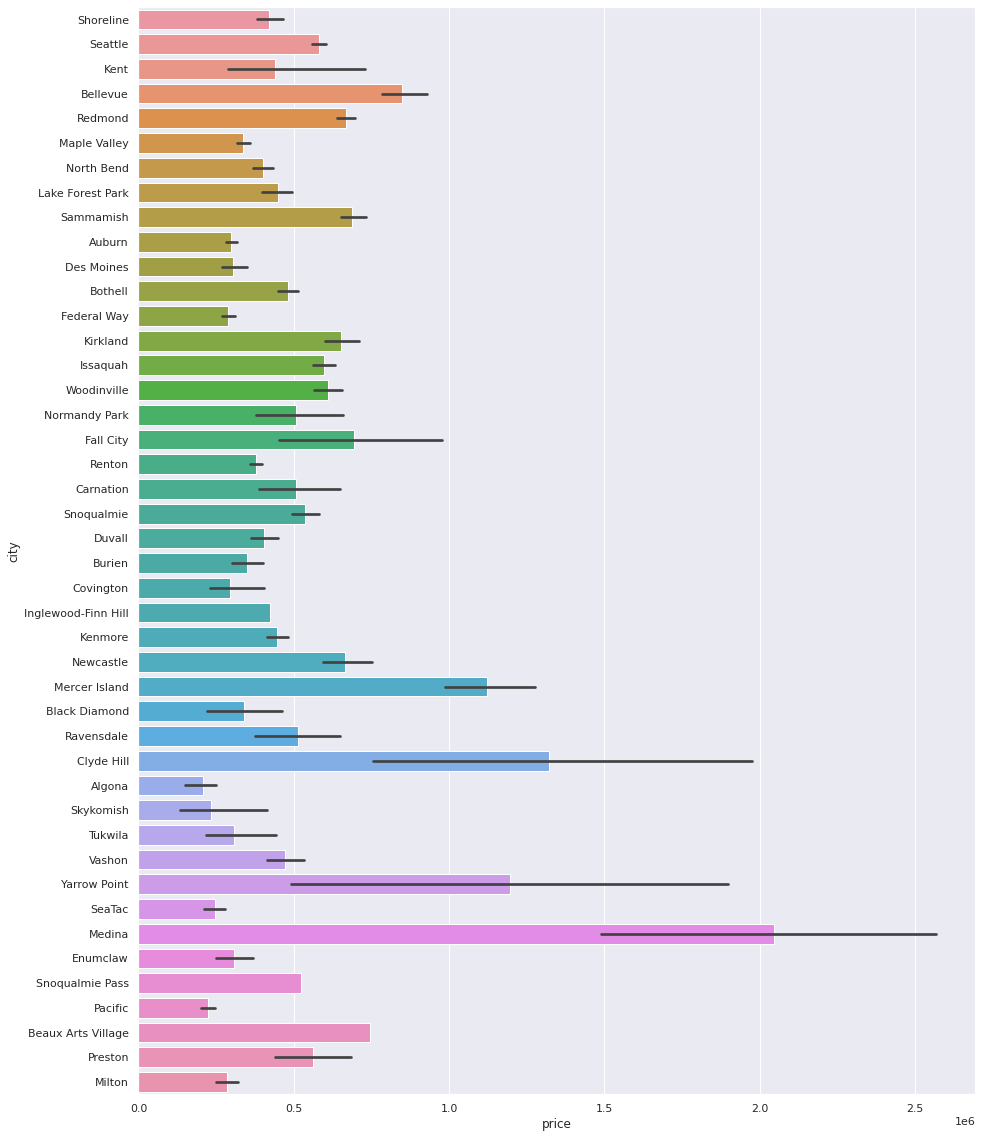

In [450]:
plt.figure(figsize=(15,20))
sns.barplot(data=df,y='city',x='price',orient="h3")


<AxesSubplot:>

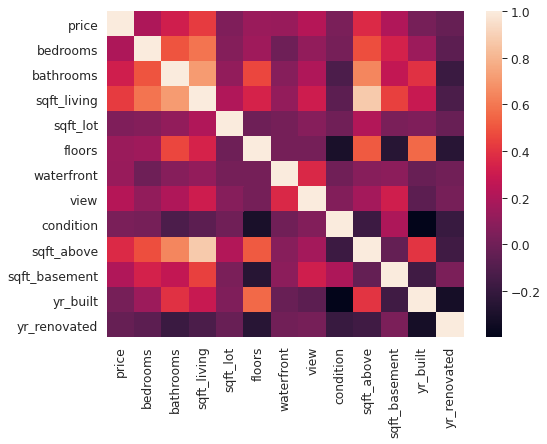

In [451]:


plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)
sns.heatmap(df.corr())




In [452]:
#df.drop(columns=['city','country'],inplace=True)
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["street"]=LE.fit_transform(df["street"])
df["city"]=LE.fit_transform(df["city"])
df["country"]=LE.fit_transform(df["country"])
df.drop(columns=['date','statezip'], inplace=True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,country
0,3.130000e+05,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,1522,36,0
1,2.384000e+06,5,2,3650,9050,2,0,4,5,3370,280,1921,0,3899,35,0
2,3.420000e+05,3,2,1930,11947,1,0,0,4,1930,0,1966,0,2291,18,0
3,4.200000e+05,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,4263,3,0
4,5.500000e+05,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,4352,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1,1510,6360,1,0,0,4,1510,0,1954,1979,3447,35,0
4596,5.343333e+05,3,2,1460,7573,2,0,0,3,1460,0,1983,2009,960,3,0
4597,4.169042e+05,3,2,3010,7014,2,0,0,3,3010,0,2009,0,4033,32,0
4598,2.034000e+05,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,3498,35,0


In [453]:
X = df.drop('price',axis =1).values
y = df['price'].values

In [454]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [455]:
linreg=LinearRegression()
linreg.fit(X_train, y_train)
y_test_pred=linreg.predict(X_test)

In [456]:
acc=r2_score(y_test,y_test_pred)
acc

0.3016082702779329

In [457]:
print('R-squared score (training): {:.3f}'.format(linreg.score(X,y)))

# Medidas de erro na amostra teste
me2   = round((y_test-y_test_pred).mean(),2)
mae2  = (mean_absolute_error(y_test, y_test_pred)).round(2)
mse2  = (mean_squared_error(y_test, y_test_pred)).round(2)
rmse2  = (np.sqrt(mean_squared_error(y_test, y_test_pred))).round(2)
mpe2  = round(((y_test - y_test_pred)/y_test).mean(),2)
mape2  =  round((mae2/y_test).mean(),2) 

R-squared score (training): 0.218


<ipython-input-457-a31c4b84e4b4>:8: RuntimeWarning: divide by zero encountered in true_divide
  mpe2  = round(((y_test - y_test_pred)/y_test).mean(),2)
<ipython-input-457-a31c4b84e4b4>:9: RuntimeWarning: divide by zero encountered in true_divide
  mape2  =  round((mae2/y_test).mean(),2)
